In [13]:
from pathlib import Path
import geopandas as gpd
import pandas as pd
import numpy as np

BASE_DIR = Path('.').resolve().parent
tile_shp = BASE_DIR.joinpath('data/datain/tile_shp/PN19032_THabitat_UTM39N.shp')
out_dir = BASE_DIR.joinpath('data/dataout')
txt_file = BASE_DIR.joinpath('QCShapefiles/missing_joins.txt')
with open(txt_file, 'r') as f:
    missing_joins = f.readlines()
stripped_joins = []
for i in missing_joins:
    stripped_joins.append(i.strip('\n'))

gdf = gpd.read_file(tile_shp)
gdf_missing = gdf[gdf['OrthoID'].isin(stripped_joins)]


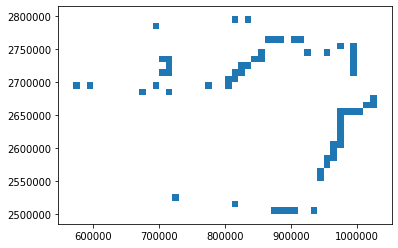

In [15]:
gdf_missing.plot()

In [16]:
gdf_missing.to_file(tile_shp.parent.joinpath('OrthoID_no_habitat_intersection.shp'))

In [23]:
import shutil
no_hab = out_dir.joinpath('no_habiat_join')
if not no_hab.exists():
    no_hab.mkdir(parents=True, exist_ok=True)
for i in stripped_joins:
    empty_folder = out_dir.joinpath(i)
    if not [x for x in empty_folder.iterdir()]:
        shutil.move(empty_folder, no_hab.joinpath(empty_folder.name))
    else:
        print(i)

In [25]:
count = 0
count_ = 0 
for i in stripped_joins:
    empty_folder = out_dir.joinpath(i)
    moved_folder = out_dir.joinpath(f'no_habitat_join')
    if not empty_folder.exists():
        count += 1
    
print(count)
    

63
